# 9주차 크롤링 2

## HTML

HTML(HyperText Markup Language)
- 웹 페이지 표시를 위해 개발된 언어
- 확장자는 html, htm
- 하이퍼텍스트(HyperText): 참조(하이퍼링크)를 통해 한 문서에서 다른 문서로 즉시 접근 가능
- 마크업 언어(Markup Language): 문서의 내용 뿐만 아니라, 태그 등을 이용하여 글자 크기, 모
양 등 문서의 출력 형태까지 명기
- 태그(tag)를 사용하여 문서의 구조, 출력 형태 등을 조정
- 태그는 < >를 사용하여 표시하며, <태그명>으로 시작하고 </태그명>으로 끝맺는데, 이 사이
에 내용을 넣는다.
- 태그에는 태그의 성격을 구체화 하는 속성(attribute)를 부여할 수 있음

HTML
- DOCTYPE: 웹문서가 어떤 버전의 HTML 언어로 작성되었는지 웹브라우저에 전달
- head 영역: 브라우저에 해당 문서에 대한 정보(metadata)를 제공해 주는 영역
- body 영역: 표시되는 페이지의 내용
- title: 해당 문서의 제목(title)을 정의, 브라우저의 제목 표시줄이나 페이지 탭의 제목으로 사용
- 요소(element): 태그와 태그(tag)로 감싸진 콘텐츠
- 속성과 값(attribute & value) : \<tagname attribute="value"> 콘텐츠 \</tagname>
- <p> 요소: 문단(paragraph) 구분
- <a> 요소: anchor, 하이퍼링크 : href 속성: 연결하고자 하는 웹 주소


In [1]:
import urllib.request
from bs4 import BeautifulSoup
from selenium import webdriver # Selenium 패키지의 WebDreiver import

html = '<h1 id="title">한빛출판네트워크</h1><div class="top"><ul class="menu"><li><a href=http://www.hanbit.co.kr/member/login.html class="login">로그인</a></li></ul><ul class="brand"><li><a href=http://www.hanbit.co.kr/media/>한빛미디어</li><li><a href="http://www.hanbit.co.kr/academy/">한빛아카데미</a></li></ul></div>'
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())
 # prettify 이쁘게 정리해줌

<h1 id="title">
 한빛출판네트워크
</h1>
<div class="top">
 <ul class="menu">
  <li>
   <a class="login" href="http://www.hanbit.co.kr/member/login.html">
    로그인
   </a>
  </li>
 </ul>
 <ul class="brand">
  <li>
   <a href="http://www.hanbit.co.kr/media/">
    한빛미디어
   </a>
  </li>
  <li>
   <a href="http://www.hanbit.co.kr/academy/">
    한빛아카데미
   </a>
  </li>
 </ul>
</div>


In [2]:
# 지정한 한 개의 태그 파싱 : ▪ bs4.element.Tag 반환
soup.h1  #  soup.div soup.ul soup.li soup.a 

# 지정한 태그를 모두 파싱 : bs4.element.ResultSet 반환(bs4.element.Tag들의 list)
soup.find_all("ul")

[<ul class="menu"><li><a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인</a></li></ul>,
 <ul class="brand"><li><a href="http://www.hanbit.co.kr/media/">한빛미디어</a></li><li><a href="http://www.hanbit.co.kr/academy/">한빛아카데미</a></li></ul>]

In [3]:
# 속성 
# attrs: 속성 이름과 속성값으로 딕셔너리 구성
tag_a = soup.a
display(tag_a)

# find(): 속성을 이용하여 특정 태그 파싱
tag_ul_brand = soup.find('ul', attrs={'class':'brand'})
display(tag_ul_brand) ; print()

title = soup.find(id="title")
display(title)
display(title.string) ; print()

# select(): 여러 단계를 지정한 태그를 모두 파싱하여 리스트 구성
li_list = soup.select("div>ul.brand>li")
for li in li_list:
    display(li.string)  # print(li.get_text())
print()
    
# get(): 속성의 값 반환
# string속성: 태그의 문자열 획득    
tag_a = soup.find('a')
display(type(tag_a))
display(tag_a.get('href'))
display(tag_a.string)

<a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인</a>

<ul class="brand"><li><a href="http://www.hanbit.co.kr/media/">한빛미디어</a></li><li><a href="http://www.hanbit.co.kr/academy/">한빛아카데미</a></li></ul>

<h1 id="title">한빛출판네트워크</h1>

'한빛출판네트워크'

'한빛미디어'

'한빛아카데미'

bs4.element.Tag

'http://www.hanbit.co.kr/member/login.html'

'로그인'

크롤링 허용 여부 확인하기
-  웹 페이지를 크롤링하기 전에 크롤링 허용 여부를 확인하기 위해 주소 창에 ‘크롤링할 주소/robots.txt’를 입력

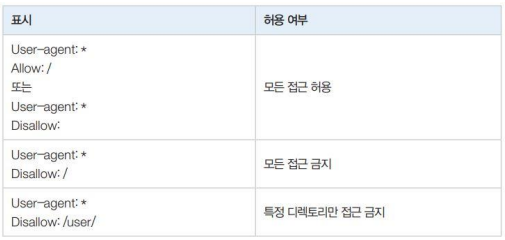

In [4]:
Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store=' %1
print(Hollys_url) #url

html = urllib.request.urlopen(Hollys_url) #정적 크롤링
soupHollys = BeautifulSoup(html, 'html.parser') #파씽
# soupHollys

tag_tbody = soupHollys.find('tbody')  # find 태그명
# tag_tbody

for store in tag_tbody.find_all('tr'): #find_all 모든 태그명
    store_td = store.find_all('td')    #찾은 거에서 다시 findall
    print(store_td[1].string)

https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=
화성향남DT점
발산역점
목동파리공원점
인천한길안과병원점
북한산DI점
울산시청점
울산성남점
구미상모사곡점
신도림테크노마트점
KG타워점


## selenium

In [5]:
wd = webdriver.Chrome() # 크롬 WebDriver 객체 생성
CoffeeBean_URL = "https://www.coffeebeankorea.com/store/store.asp"

wd.get(CoffeeBean_URL) # 웹 페이지 연결
wd.execute_script("storePop2(31)") # 자바스크립트 함수 호출
html = wd.page_source # 자바스크립트 함수가 수행된 페이지의

# 소스 코드를 저장
soupCB = BeautifulSoup(html, 'html.parser') # BeautifulSoup 객체를 생성
print(soupCB.prettify())
wd.quit() # 브라우저 닫기

<html class="js canvas canvastext no-touch geolocation postmessage indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderradius boxshadow textshadow opacity cssanimations cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg" lang="ko-KR" style="">
 <!--<![endif]-->
 <head>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   STORE | COFFEE BEAN KOREA
  </title>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densitydpi=medium-dpi" name="viewport"/>
  <link href="/images/favicon-16x16.png" rel="shortcut ico

In [6]:
# 예외처리 try - except - finally
try:
    4 / 0
except ZeroDivisionError as e: # Exception 이라고 전체 지정도 가능
    print(e)
finally :
    print("여기는 오류나든 안나든 실행~")

division by zero
여기는 오류나든 안나든 실행~


# 10주차 통계 분석
- 기술 통계
    - 측정이나 실험에서 수집한 자료(data)의 정리, 요약, 해석, 표현 등을 통해 자료의 특성을 규명하는 통계적 방법
    - 평균,표준편차등과 같은 수치나 산점도,막대그래프 같은 그래픽적 표현이 있다.

In [7]:
# 여기는 볼필요 없이 준비단계임
import pandas as pd

red_df = pd.read_csv('./winequality-red.csv', sep = ',', header = 0)
white_df = pd.read_csv('./winequality-white.csv', sep = ',', header = 0)
red_df.to_csv('./winequality-red2.csv',index = False)
white_df.to_csv('./winequality-white2.csv', index = False)

# 레드 와인/화이트 와인 데이터 병합(type 열 추가하여 구분)
# 삽입될 위치열 인덱스, 삽입될 열이름, 삽입될 열의 값, allow_duplicates : 기본값은 False로 True일 경우 중복 열의 삽입을 허용
red_df.insert(0, column = 'type', value = 'red') 
white_df.insert(0, column = 'type', value = 'white') 

wine = pd.concat([red_df, white_df], axis = 0) # concat
wine.reset_index(drop=True, inplace=True) # reset_index하고 기존 인덱스 드랍(열로 안가고)
wine.info() # DataFrame에 대한 기본정보를 인쇄: index dtype, column, null이 아닌 값 및 메모리 사용량
# df.set_index(column_name, inplace = True) -> 특정 열을 인덱스로

wine.columns = wine.columns.str.replace(' ', '_')
wine.describe() # describe
display(wine)

wine.quality.unique() # 유니크 한 값
wine.quality.value_counts() # 빈도수 세기
wine.quality.value_counts(normalize=True) # 정규화한 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

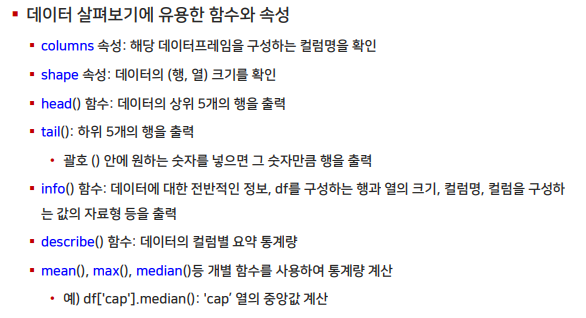
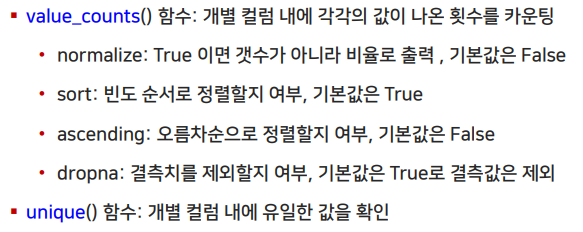

In [8]:
wine.groupby('type')['quality'].describe()
wine.groupby('type')['quality'].mean() # median(), min(), max() quantile([0.25,0.5,0.75])
wine.groupby('type')['quality'].std()
display(wine.groupby('type')['quality'].agg(['mean', 'std', 'describe']))  # 여러개를 보여줌
display(wine.groupby('type')['quality'].quantile([0.25,0.5,0.75]))
display(wine.groupby('type')['quality'].quantile([0.25,0.5,0.75]).unstack())

mean       std describe                                          \
        quality   quality    count      mean       std  min  25%  50%  75%   
type                                                                         
red    5.636023  0.807569   1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0   
white  5.877909  0.885639   4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0   

            
       max  
type        
red    8.0  
white  9.0

type       
red    0.25    5.0
       0.50    6.0
       0.75    6.0
white  0.25    5.0
       0.50    6.0
       0.75    6.0
Name: quality, dtype: float64

,0.25,0.50,0.75
type,,,
red,5.0,6.0,6.0
white,5.0,6.0,6.0


In [9]:
from scipy import stats

#레드 와인 샘플의 quality 값만 찾아서 red_wine에 저장
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
# 화이트 와인 샘플의 quality 값만 찾아서 white_wine에 저장
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']
                              
# scipy 패키지의 stats.ttest_ind() 함수를 사용하여 t-검정을 하고 두 그룹 간 차이를 확인
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

scipy.stats.ttest_ind()
- 두 개의 독립적인 샘플의 평균에 대한 t-검정을 계산
- 2개의 독립적인 표본이 동일한 평균(예상) 값을 갖는다는 귀무 가설에 대한 검정
- 기본적으로 모집단의 분산이 동일하다고 가정
    - equal_var: True(기본값)인 경우 분산이 같다는 가정, False인 경우 분산이 다르다
- 반환: t통계량, p-value
- p-value 가 유의수준(통상 5%) 과 같거나 적다면 두 집단이 유의미한 차이가 있다

상관분석
- 두 변수가 어떤 선형적 관계에 있는지를 분석하는 방법
- 두 변수는 서로 독립적이거나 상관된 관계일 수 있는데, 두 변수의 관계의 강도를 상관관계라고 함
- 상관 계수는 두 변수가 연관된 정도를 나타낼 뿐 인과 관계를 설명하지 않으므로 정확한 예측치를 계산할 수는 없음
- 상관분석 시각화: 두 변수의 관계를 보여주는 산점도나 히트맵

 피어슨 상관계수: 일반적으로 말하는 상관계수
- 두 변수 간의 선형 상관관계를 계량화한 수치
- -1부터 1의 값을 가짐
- 1은 완벽한 양의 상관관계, 0은 상관관계가 없음, -1은 완벽한 음의 선형 상환관계
- 양의 상관관계: 한 변수의 값이 증가할 때 다른 변수의 값도 증가하는 경향
- 음의 상관관계: 한 변수의 값이 증가할 때 다른 변수의 값이 감소하는 경향

상관계수 함수: corr(method='pearson', min_periods=1)
- 각 열 간의 상관 계수를 반환하는 메서드
- method: 상관계수 산정 방식, 기본은 피어슨 상관계수(두 변수 간의 선형 상관관계를 계량화 한
수치)
- min_periods : 유효한 결과를 얻기위한 최소 값의 수

In [10]:
wine_corr= wine.corr()
wine_corr

C:\Users\chris\AppData\Local\Temp\ipykernel_12236\3707843059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_corr= wine.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [11]:
display(wine_corr.loc[wine_corr['quality'] > 0, 'quality']) # 양의 상관관계를 가지는 속성: 구연산,무수아황산,산성도,황산염,알콜도수
display(wine_corr.loc[wine_corr['quality'] < 0, 'quality']) # 음의 상관관계를 가지는 속성:고정산,휘발산,잔여당,염화물,총이산화황,밀도

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

seaborn 
- sns.distplot -> bar와 스무스한 밀도함수가 같이 등장함
- sns.violinplot -> 바이올린같이 생김
- sns.countplot
- sns.heatmap
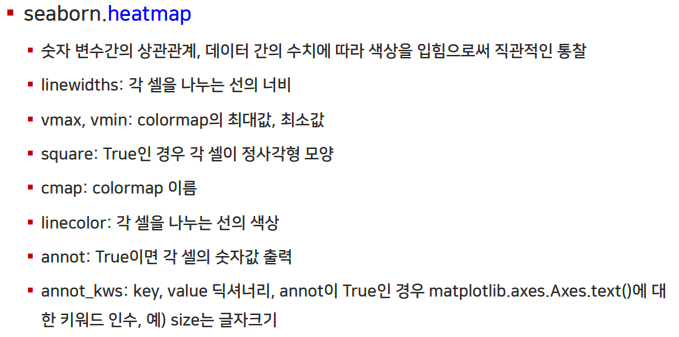
- sns.pairplot -> 여러개를 n x n 으로 변수마다시각화 (참고 : np.random.choice) : 산점도로 변수 간의 상관 분석 시각화
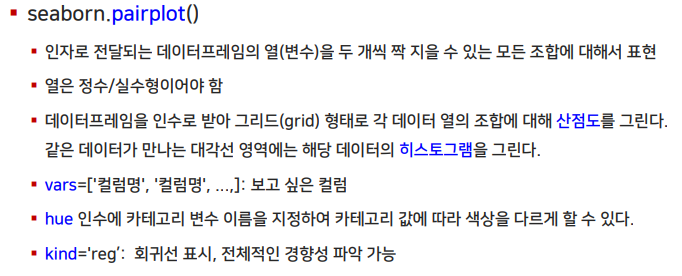

- sns.catplot
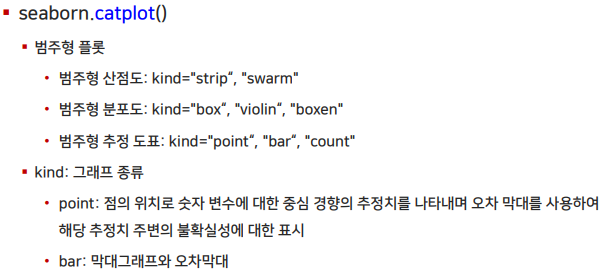

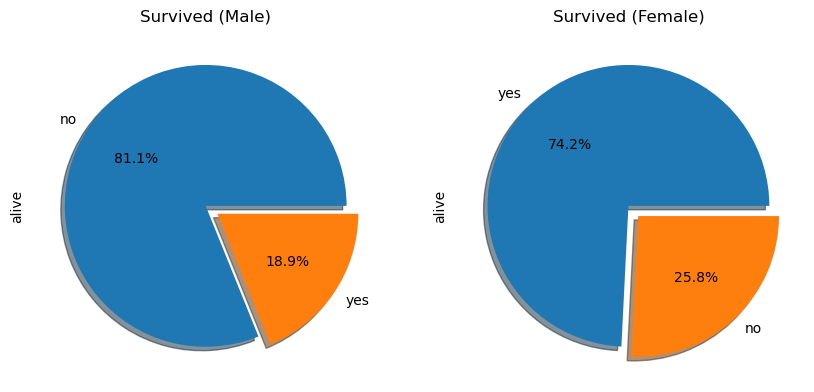

In [12]:
# 안봐도 되는 준비 파트
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
titanic.to_csv('./titanic.csv', index = False)

# 칼럼별 결측값 개수 구하기
titanic.isnull().sum()

# 결측값 채우기 : df.fillna(0, inplace=True)
titanic['age'] = titanic['age'].fillna(titanic['age'].median()) # age 열의 결측값을 중앙값으로 치환
titanic['embarked'] = titanic['embarked'].fillna('S') # embarked 열의 결측값을 최빈값으로 치환
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton') # embark_town 열의 결측값을 최빈값으로 치환
titanic['deck'] = titanic['deck'].fillna('C') # deck 열의 결측값을 최빈값으로 치환

# subplots 그리기 
f,ax = plt.subplots(1, 2, figsize = (10, 5)) # 이부분과 ax = ax[0] 부분 중요 
titanic['alive'][titanic['sex'] == 'male'].value_counts().plot(kind = 'pie', explode = [0,0.1], autopct =
'%.1f%%', ax = ax[0], shadow = True)
titanic['alive'][titanic['sex'] == 'female'].value_counts().plot(kind = 'pie', explode = [0,0.1], autopct =
'%.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

상관관계
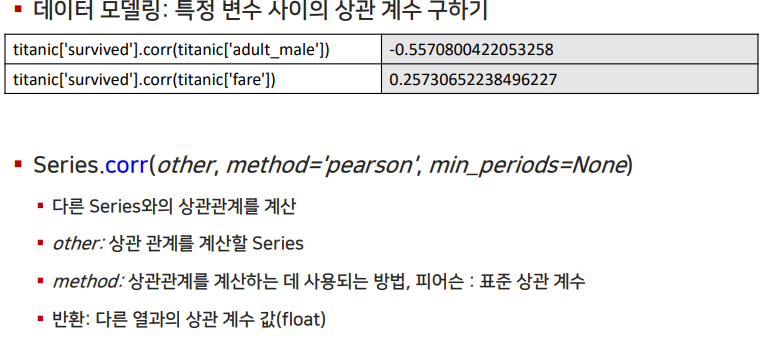

인덱싱
- DataFrame.loc(): 레이블 기반으로 인덱싱
- 값 가져오기 : result = df.loc['행', '열’]
- 값 설정하기 : df.loc['행', '열'] = value
- 가능한 Input
    1. 레이블 (만약 3을 입력할 경우 정수위치가 아닌 index의 레이블로 해석
    2. list 객체 (예 : ['a', 'b', 'c'])
    3. 레이블의 슬라이스 객체 (예 : 'b' : 'f')
    4. 슬라이싱되는 축과 길이가 같은 bool 배열 (예 : [True, True, False, True])

In [13]:
# MAP
# 성별을 male/female에서 1/0으로 치환
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

s = pd.Series(['cat', 'dog', 'bear', 'rabbit'])
print(s, '\n') 
print(s.map({'cat': 'kitten', 'dog': 'puppy'}), '\n' ) #특정 값 변경 가능
print(s.map('There is a {}'.format), '\n') # 포멧팅 변경가능
def make_string(name): return 'There is a '+ name
print(s.map(make_string)) # 함수 매핑도 가능

0       cat
1       dog
2      bear
3    rabbit
dtype: object 

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object 

0       There is a cat
1       There is a dog
2      There is a bear
3    There is a rabbit
dtype: object 

0       There is a cat
1       There is a dog
2      There is a bear
3    There is a rabbit
dtype: object


In [14]:
# apply(): 행 또는 열 또는 전체의 셀(=원소)에 원하는 연산을 지원
s = pd.Series([20, 21, 12], index=['London', 'NewYork', 'Helsinki'])
print(s,"\n")

def square(x): return x ** 2
print(s.apply(square),"\n")

print(s.apply(lambda x: x ** 2),"\n")

London      20
NewYork     21
Helsinki    12
dtype: int64 

London      400
NewYork     441
Helsinki    144
dtype: int64 

London      400
NewYork     441
Helsinki    144
dtype: int64 



# 11 주차 : 빅데이터_텍스트빈도분석

텍스트 전처리: 분석 작업의 정확도를 높이기 위해 분석에 사용할 데이터를 먼
저 정리하고 변환하는 작업
- 토큰화(tokenization): 문서를 토큰(token)이라 불리는 단위로 나누는 작업
- 정제(cleaning): 불필요한 기호 또는 문자를 제거
- 정규화(normalization): 같은 의미이면서 표현이 다른 단어를 통합
- 불용어, 불필요 단어 제거: 문장의 의미에 영향을 미치지 않는 불필요한 용어를 제거하는 작업 ex) a, am, the
- 철자수정
- 어간추출 (Stemming): 단어의 의미를 담고 있는 단어의 핵심 부분을 추출
- 표제어(기본형) 추출 (Lemmatization): 품사를 지정하여 추출

토큰화 (Tokenization)
- 토큰의 기준:
- 보통 단어(word)를 기준, 이외에도 문자(철자) 또는 구(phase), 문장(sentence), 단락(paragraph) 등을 기준으로 할 수 있음

In [15]:
from nltk.tokenize import word_tokenize

# 단어 기준 토큰화
text="Text mining, also referred to as text data mining, similar to text analytics, is the process ofderiving high-quality information from text."
print(word_tokenize(text), '\n') 

from nltk.tokenize import sent_tokenize
text="""It involves the discovery by computer of new, previously unknown information, by
automatically extracting information from different written resources.
Written resources may include websites, books, emails, reviews, and articles.
High-quality information is typically obtained by devising patterns and trends by means such as
statistical pattern learning.
According to Hotho et al. (2005) we can differ three different perspectives of text mining: information
extraction, data mining, and a KDD (Knowledge Discovery in Databases) process."""
print(sent_tokenize(text), '\n')

['Text', 'mining', ',', 'also', 'referred', 'to', 'as', 'text', 'data', 'mining', ',', 'similar', 'to', 'text', 'analytics', ',', 'is', 'the', 'process', 'ofderiving', 'high-quality', 'information', 'from', 'text', '.'] 

['It involves the discovery by computer of new, previously unknown information, by\nautomatically extracting information from different written resources.', 'Written resources may include websites, books, emails, reviews, and articles.', 'High-quality information is typically obtained by devising patterns and trends by means such as\nstatistical pattern learning.', 'According to Hotho et al.', '(2005) we can differ three different perspectives of text mining: information\nextraction, data mining, and a KDD (Knowledge Discovery in Databases) process.'] 



정제(Cleaning)와 정규화(Normalization)
- 규칙기반 유사 의미 단어 통합: “US”, “USA”, “United States”, …
- 대, 소문자 통합: “Automobile” = “automobile”
- 불필요 단어 제거: 출현빈도가 작은 단어 또는 길이가 짧은 단어

In [16]:
# 텍스트 정규화
sentence = 'I visited US from UK on 22-10-18'
normalized_sentence = sentence.replace("US", "United State").replace("UK", "UnitedKingdom").replace("-18","-2018")
print(normalized_sentence)

I visited United State from UnitedKingdom on 22-10-2018


불용어 제거 : 문장의 의미에 영향을 미치지 않는 불필요한 용어를 제거하는 작업 ex) a, am, the

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english') #영어 stopword
print(stop_words[:10])

sentence = ' I am learning Python. It is one of the most popular programming language.'
word_tokens = word_tokenize(sentence)
print(word_tokens)

result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
print(result) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['I', 'am', 'learning', 'Python', '.', 'It', 'is', 'one', 'of', 'the', 'most', 'popular', 'programming', 'language', '.']
['I', 'learning', 'Python', '.', 'It', 'one', 'popular', 'programming', 'language', '.']


철자수정

In [18]:
from autocorrect import Speller # 필요 패키지 로드
spell = Speller()
sentence = "Natral Language Procesing deals with the art of extracting insightes from Natural Languages."
spell(sentence)

'Natural Language Processing deals with the art of extracting insights from Natural Languages.'

어간추출 (Stemming): 단어의 의미를 담고 있는 단어의 핵심 부분을 추출

In [19]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 = LancasterStemmer()
words = ["fly", "flies", "flying", "flew", "flown"]
print("Porter Stemmer :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

st1.stem('saying')

Porter Stemmer : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


'say'

표제어(기본형) 추출 (Lemmatization)

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [21]:
print(lm.lemmatize('products'))
print(lm.lemmatize('amusing','v'),lm.lemmatize('amuses','v'),lm.lemmatize('amused','v'))
print(lm.lemmatize('happier','a'),lm.lemmatize('happiest','a'))
print(lm.lemmatize('fancier','a'),lm.lemmatize('fanciest','a'))
print(lm.lemmatize('was', 'v'), lm.lemmatize('love', 'v'))

product
amuse amuse amuse
happy happy
fancy fancy
be love


품사 부착

In [22]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
display(tagged_list)

nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
display(nouns_list)

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

['refuse', 'permit']

In [23]:
# List comprehension(리스트 컴프리헨션)은 잘 아니까 패스~

glob()
- 많은 파일들을 다뤄야 하는 파이썬 프로그램을 작성할 때, 특정한 패턴이나 확장자를 가진 파일들의 경로나 이름이 필요할 때
- glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
- '*'는 임의 길이의 모든 문자열을 의미, '?'는 한자리의 문자를 의미

In [24]:
from glob import glob
print(glob('*.txt'))
print(glob('outpu?.txt'))
print(glob('C:\\image\\*.png'))
print(glob('C:\\p*'))

['1993_clinton.txt', '2002_bush.txt', 'output.txt', 'score.txt']
['output.txt']
[]
['C:\\pagefile.sys', 'C:\\PerfLogs', 'C:\\Program Files', 'C:\\Program Files (x86)', 'C:\\ProgramData']


In [25]:
from glob import glob
# 10개의 엑셀 파일 이름을 all_files 리스트에 저장
all_files = glob('./myCabinetExcelData/myCabinetExcelData*.xls')
all_files

['./myCabinetExcelData\\myCabinetExcelData (1).xls',
 './myCabinetExcelData\\myCabinetExcelData (2).xls',
 './myCabinetExcelData\\myCabinetExcelData (3).xls',
 './myCabinetExcelData\\myCabinetExcelData (4).xls',
 './myCabinetExcelData\\myCabinetExcelData (5).xls',
 './myCabinetExcelData\\myCabinetExcelData (6).xls',
 './myCabinetExcelData\\myCabinetExcelData (7).xls',
 './myCabinetExcelData\\myCabinetExcelData (8).xls',
 './myCabinetExcelData\\myCabinetExcelData (9).xls',
 './myCabinetExcelData\\myCabinetExcelData.xls']

정규 표현식(Regular Expression)
- 특정 문자열의 패턴을 표현하는 식
- 문자열 처리함수를 시용하는 것보다 복잡한 표현을 보다 간결하게 표현
- 정규 표현식에서 사용하는 메타 문자(meta characters)
    - \[ \]: 대괄호 안에 어떤 문자 또는 나열된 문자열이 있으면 그 나열된 문자 중 어느 한개를 의미
    - 정규식 [abc]와 문자열 "a", "before", "dude“: "dude“는 매치되지 않음
    - \[ \] 안의 두 문자 사이에 하이픈(-)을 사용하면 두 문자 사이의 범위(From - To)를 의미
    예) [a-zA-Z]: 알파벳 모두, [0-9] : 숫자
-  ^: 반대(not)라는 의미
    - [^0-9]: 숫자가 아닌 문자만 매치
-  Dot(.): 줄바꿈 문자인 \n을 제외한 모든 문자와 매치
    -  정규식 a.b 는 "a + 모든문자 + b“ 의미, "aab"와 "a0b"는 매치, "abc"는 매치하지 않음
-  반복 (*): * 바로 앞에 있는 문자가 0부터 무한대로 반복될 수 있다는 의미
-  반복 (+): +는 최소 1번 이상 반복
    
    
정규 표현식(Regular Expression)
- 반복 ({m,n}): {m, n} 정규식을 사용하면 반복 횟수가 m부터 n까지 매치
    - 생략된 m은 0과 동일, 생략된 n은 무한대
    - 예) {2}면 2번 반복하는 것이고 {2, 4}면 2~4번 반복, ca{2}t 는 a가 반드시 2번 반복
- ?: 0회 또는 1회 반복 즉 {0, 1} 의미
- \d: 숫자와 매치, [0-9]와 동일한 표현식
- \D: 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식
- \s: whitespace 문자와 매치
- \S: whitespace 문자가 아닌 것과 매치
- \w: 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9]와 동일한 표현식
- \W: 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9]와 동일한 표현식

In [26]:
import re
print(re.match('[a-z]+', "python 3"))
print(re.match('[a-z]+', "3 python"))
print(re.search('[a-z]+', "3 python"))
print(re.findall('[a-z]+', "life is too short"))
print(re.sub('-[0-9]{7}','-******',"900206-1234567"))
print(re.sub("\d", "number", "7 candy"))

<re.Match object; span=(0, 6), match='python'>
None
<re.Match object; span=(2, 8), match='python'>
['life', 'is', 'too', 'short']
900206-******
number candy


In [27]:
# 데이터 준비 파트 안중요!

import re # 정규식을 사용하기 위한 모듈
from nltk.corpus import stopwords # 불용어 정보를 제공하는 모듈
from nltk.stem import WordNetLemmatizer # 표제어 추출을 제공하는 모듈
from nltk.tokenize import word_tokenize # 단어 토큰화 작업을 위한 모듈

stopWords = set(stopwords.words("english")) # 영어 불용어
print(stopWords)

lemma = WordNetLemmatizer()

all_files_data = [] #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_title = all_files_data_concat['제목']
words = []
for title in all_title:
    EnWords = re.sub("[^a-zA-Z]+", " ", str(title)) # 알파벳이 아닌 문자 제거
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화,단어 토큰화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #불용어를 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
    words.append(EnWordsTokenStopLemma)
# words
    
words2 = []
for title in all_title:
    EnWords = re.sub("[^a-zA-Z]+", " ", str(title))
    print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower())
    print(EnWordsToken)
    EnWordsTokenStop = []
    for w in EnWordsToken:
        if w not in stopWords:
            EnWordsTokenStop.append(w)
    print(EnWordsTokenStop)
    EnWordsTokenStopLemma = []
    for w in EnWordsTokenStop:
        EnWordsTokenStopLemma.append(lemma.lemmatize(w))
    print(EnWordsTokenStopLemma)
    words2.append(EnWordsTokenStopLemma)
# words2

{'theirs', 'once', 'some', 'into', 'further', 'on', "wasn't", 'all', 'this', 'haven', 'are', 'i', 'does', "should've", 'needn', 'only', 're', 'who', "that'll", 'be', 'there', 'how', 'isn', "shouldn't", 'his', 'him', 'hers', 'the', "you've", 'against', "you'll", 'until', 'that', 'such', 'when', 'my', 'below', "mightn't", 'ma', 'didn', 'nor', 'for', 'than', 'o', 'out', 'she', 'during', 'to', 'can', "don't", 'then', 'they', 'weren', 'these', 'more', 'itself', 'myself', 'not', "aren't", 'hasn', 'their', 'or', 'having', 'd', 'yours', 'here', "you'd", 'its', 'just', "hasn't", 'at', 'now', 'and', 'do', 'too', 'ain', 'have', 'if', 'them', 'as', 'where', "haven't", 'any', 'above', 'about', 'ours', "won't", 'down', 'her', 'own', 'why', 'should', 'very', 'after', 'did', "shan't", 'an', "she's", 'but', 'won', 'which', 'whom', 't', 'yourself', "needn't", 'is', 'doesn', 'had', "didn't", 'has', 'being', 'himself', 'm', 'both', 'themselves', 'through', 'between', "you're", 'from', "doesn't", "wouldn't

['how', 'big', 'data', 'reveals', 'the', 'little', 'things', 'that', 'matter', 'online', 'profiling', 'tools', 'can', 'create', 'connected', 'data', 'that', 'lets', 'you', 'see', 'your', 'target', 'market', 'as', 'human', 'beings', 'and', 'not', 'just', 'numbers', 'says', 'yougov', 's', 'freddie', 'savers']
['big', 'data', 'reveals', 'little', 'things', 'matter', 'online', 'profiling', 'tools', 'create', 'connected', 'data', 'lets', 'see', 'target', 'market', 'human', 'beings', 'numbers', 'says', 'yougov', 'freddie', 'savers']
['big', 'data', 'reveals', 'little', 'thing', 'matter', 'online', 'profiling', 'tool', 'create', 'connected', 'data', 'let', 'see', 'target', 'market', 'human', 'being', 'number', 'say', 'yougov', 'freddie', 'saver']
Policing crime and big data towards a critique of the moral economy of stochastic governance
['policing', 'crime', 'and', 'big', 'data', 'towards', 'a', 'critique', 'of', 'the', 'moral', 'economy', 'of', 'stochastic', 'governance']
['policing', 'crim

데이터 준비
- 전처리가 끝난 words는 2차원 리스트이므로 reduce() 함수를 사용하여 1차원 리스트로 변환
- reduce(fun,seq): 반복 가능한 객체의 요소에 차례대로(왼쪽에서 오른쪽으로) fuction을 누적 적용하여 하나의 결과를 반환하는 함수
    - 예) reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) ➔ ((((1+2)+3)+4)+5)


In [58]:
from functools import reduce
words3 = reduce(lambda x, y: x+y, words)
print(words3)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

collections 모듈의 Counter
- 데이터의 개수를 셀 때 유용
- 동일한 값의 자료가 몇개인지를 파악하는데 사용
- most_common(n) : 입력된 값의 요소들 중 빈도수(frequency)가 높은 순으로 상위 n개를 리스트(list) 안의 투플(tuple) 형태로 반환

In [29]:
from collections import Counter
print(Counter(["hi", "hey", "hi", "hi", "hello", "hey"]))
print(Counter('hello world').most_common(3))

Counter({'hi': 3, 'hey': 2, 'hello': 1})
[('l', 3), ('o', 2), ('h', 1)]


In [30]:
from collections import Counter
# 리스트에 있는 단어별로 출현 횟수를 계산하여 딕셔너리 객체인 count를 생성
count = Counter(words3)
count

# 출현 횟수가 많은 상위 50개 단어중에서 길이가 1보다 큰 것만 word_count 딕셔너리에 저장,출력
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
word_count

# key값을 기준으로 정렬하여 key값 리스트 반환
dic = {'pop': 3100, 'classic': 1450, 'trot':620}
print(sorted(dic))                 # key 값을 기준으로 오름차순 정렬하여 리스트 출력
print(sorted(dic, reverse=True))  # key 값을 기준으로 내림차순 정렬하여 리스트 출력
print()

# key 값을 기준으로 정렬한 딕셔너리 생성
print(sorted(dic.items())) # key 값을 기준으로 정렬된 (key,value) 원소쌍을 가진 리스트 출력
print(dict(sorted(dic.items()))) # key 값을 기준을 정렬된 딕셔너리 생성
print()

# value 값을 기준으로 오름차순 정렬한 딕셔너리 생성
print(sorted(dic.items(), key=lambda x:x[1]) ) # value 값을 기준으로 오름차순 정렬하여 (k, v) 리스트 반환
print(dict(sorted(dic.items(), key=lambda x:x[1]))) # 위 값을 딕셔너리로 변환
print()

# value 기준으로 정렬할 때 key 값만 얻는 경우
print(sorted(dic, key=lambda x:dic[x])) # value 값을 기준으로 오름차순 정렬
print(sorted(dic, key=dic.get)) # value 값을 기준으로 오름차순 정렬
print(sorted(dic, key=dic.get, reverse=True)) # value 값을 기준으로 내림차순 정렬

['classic', 'pop', 'trot']
['trot', 'pop', 'classic']

[('classic', 1450), ('pop', 3100), ('trot', 620)]
{'classic': 1450, 'pop': 3100, 'trot': 620}

[('trot', 620), ('classic', 1450), ('pop', 3100)]
{'trot': 620, 'classic': 1450, 'pop': 3100}

['trot', 'classic', 'pop']
['trot', 'classic', 'pop']
['pop', 'classic', 'trot']


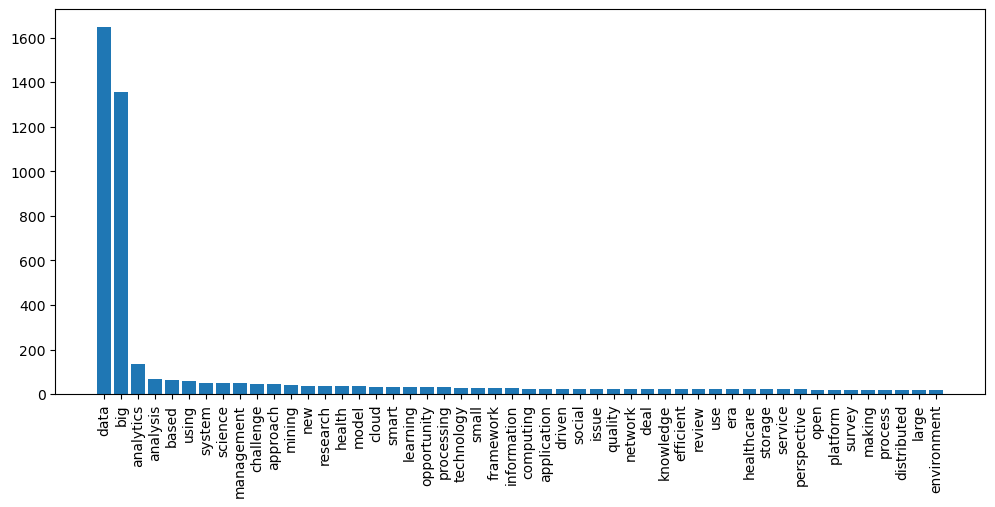

In [31]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)# value 값을 기준으로 내림차순 정렬
sorted_Values = sorted(word_count.values(), reverse=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.bar(range(len(word_count)), sorted_Values)
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='vertical')
plt.show()

In [32]:
# as_index 매개변수를 True로 설정하면, 결과로 반환되는 DataFrame의 인덱스가 그룹화에 사용된 열(또는 열들)의 값으로 설정됩니다. 
# 따라서 그룹화 결과가 인덱스를 가지게 됩니다.

# 반면에 as_index 매개변수를 False로 설정하면, 결과로 반환되는 DataFrame의 인덱스가 기본 정수 인덱스로 유지됩니다.
# 이 경우 그룹화 결과는 인덱스를 가지지 않습니다

# df.groupby() + 통계함수
# 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리(혹은 적용)하거나 그룹별 통계량을 확인하고자 할 때 유용한 함수

all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=True)['doc_count'].count() # as_index=False
display(summary_year)

summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count() # as_index=False
display(summary_year)

출판일
1994      1
1995      1
1996      1
1998      3
2002      4
2003      1
2004      3
2005      3
2007      2
2008      3
2009      2
2010      3
2011      8
2012     34
2013     87
2014    154
2015    114
2016    139
2017    158
2018    130
2019    106
2020     43
Name: doc_count, dtype: int64

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


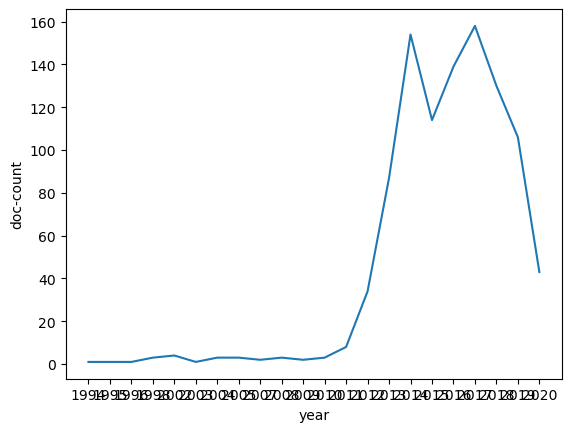

In [33]:
plt.xlabel("year")
plt.ylabel("doc-count")
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

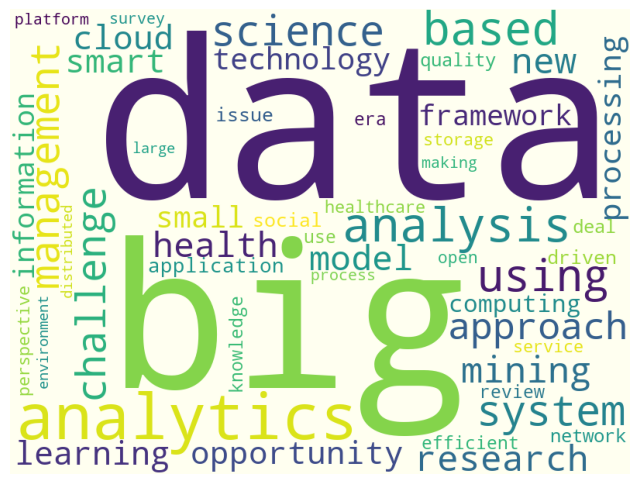

In [34]:
# 결과 시각화: 워드 클라우드로 시각화(wordcloud 모듈 설치)
    # WordCloud 함수의 주요 파라미터:
        # font_path : 사용될 폰트의 경로
        # max_words : 허용되는 최대 단어 ( 기본값 200 )
        # backgroud_color : 워드 클라우드 이미지의 배경색 ( 기본값 black)
    # generate_from_frequencies() : 미리 정의된 단어의 빈도수를 이용하여 워드클라우드를 그림


from wordcloud import WordCloud
wc=WordCloud(background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud) # 이미지 출력함수
plt.axis('off') # 축과 라벨 이름 제거
plt.show()

- 형태소
    - 언어에서 의미가 있는 가장 작은 단위
    - 단어는 의미를 갖는 문장의 가장 작은 단일 요소로, 문장에서 분리될 수 있는 부분
    - 독립형 형태소인 단어도 있지만, 대부분의 단어는 형태소와 접사로 구성
- 형태소 분석: 형태소, 어근, 접두사/접미사, 품사(POS, part-of-speech) 등 다
양한 언어적 속성의 구조를 파악하는 것
- 품사 태깅: 형태소의 뜻과 문맥을 고려하여 품사를 붙이는 것
    - 예) 가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN
    - KoNLPy에서 사용 가능한 품사 태깅 패키지: Hannanum, Kkma, Komoran, Mecab,
    Okt(Twitter) 등
    - KoNLPy: 한국어 자연어 처리를 위한 형태소 분석 패키지(https://konlpy.org/ko/latest/)


In [35]:
import json
inputFileName = 'etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json'
with open(inputFileName, 'r', encoding='utf-8') as in_json:
    data = json.load(in_json)
# data

import re
# 분석할 데이터 추출 : 정규 표현식: \w - 문자+숫자(alphanumeric)와 매치
message = ''
for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message'])
message

# 품사 태깅 : 명사 추출 : 품사 태깅 패키지인 Okt를 사용하여 명사만 추출
from konlpy.tag import Okt
okt = Okt()
message_N = okt.nouns(message)
# print(message_N) # 명사 출력

Okt(Open Korean Text)
- morphs(phrase): 형태소 추출
- nouns(phrase): 명사 추출
- pos(phrase): 품사 부착
- tagset 속성: 부착되는 품사 태그의 기호와 의미 확인

In [36]:
c = '대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국'
print(okt.nouns(c))  ; print()
print(okt.morphs(c)) ; print()
print(okt.pos(c))    ; print()
print(okt.tagset)    ; print()

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국']

[('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('·', 'Punctuation'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa'), ('건립', 'Noun'), ('된', 'Verb'), ('대한민국', 'Noun')]

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}



In [37]:
# 데이터 탐색과 모델링: 단어 빈도 구하기
count = Counter(message_N)
# print(count) ; print()

word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        # print("%s : %d" % (tag, counts))

# 12주차 : 지리정보시각화

- 좌표, 주소, 도시, 우편번호 등 위치에 대한 정보
- 벡터데이터(Vector Data) : 공간에서 점을 좌표를 이용하여 표현하고 그 점들을 이어 다양한 형태의 도형(점, 선, 다각형 등)을 표현하기 위한 데이터
    - 점(Point): 모든 점은 x, y 좌표(coordinate)
    - 선(Line): 선은 두개 이상의 점들을 순서대로 연결
    - 다각형(Polygon): 3개 이상의 점을 연결한 도형으로 마지막 점과 시작점을 연결
    
지도 데이터의 형식
- Shape file (.shp)
    - shp: 기하구조 (geometry) 포함
    - shx: 기하구조의 인덱스 파일
    - dbf: 각 기하구조의 특성치, 또는 속성값을 테이블 포맷으로 저장
- Geojson (.geojson): Json 포맷의 지리정보 데이터
    - Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


C:\Users\chris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chris\anaconda3\lib

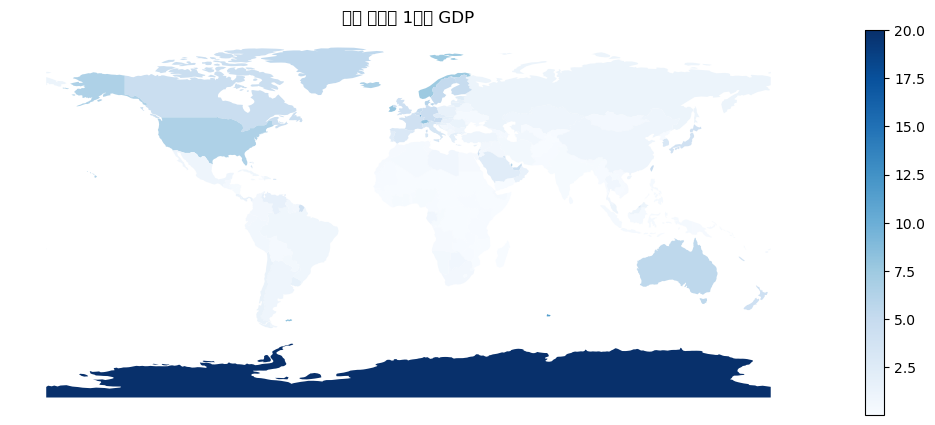

In [38]:
# 내장된 세계지도 불러오기
import matplotlib.pyplot as plt
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
display(countries.head())

# 내장된 세계지도 시각화: 1인당 GDP 데이터, legend 추가, color map 변경, 데이터 표현 추가, x-y축 제거
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100 # 1인당 GDP 계산
ax = countries.plot(column='gdp_per_cap', legend=True, cmap="Blues", figsize=(15,5))
ax.set_axis_off() # 외곽 틀을 제거하는 함수
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

In [39]:
#  seoul 데이터 프레임의 SIG_CD 열을 기준으로 폴리곤을 병합한다는 의미입니다. 
# 즉, SIG_CD 열 값이 같은 폴리곤들을 하나로 합치는 것을 의미합니다.
# seoul = seoul.dissolve(by='SIG_CD')

DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, …)
- 두 객체를 병합하는 함수
- 예) left.merge(right)
    - left는 기존객체
    - right: left와 함께 병합할 객체
    - how : 병합시 기준이 될 인덱스를 정하는 방식, 기본은 inner
        - inner은 두 객체의 인덱스의 교집합, outer은 두 객체의 인덱스의 합집합, left, right
    - on : 열 기준 병합시 기준으로 할 열의 이름이 양측이 동일하다면, on인수에 입력
    - left_on / right_on: 열기준 병합 시 기준으로 할 열의 양측 이름이 다르다면, 각각 어떤 열을 기준으로 할지 지정

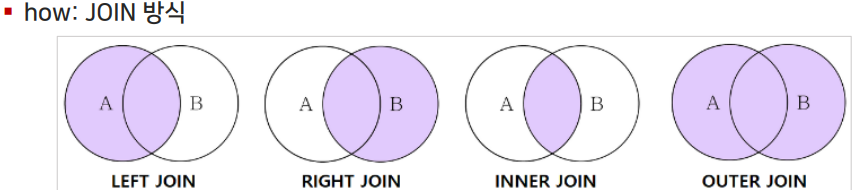

In [40]:
fruit = pd.DataFrame({'Num':[123, 456, 789, 1011, 1112], 'Fruit':['Apple', 'Banana', 'Cherry', 'Lemon', 'Peach']})
grade = pd.DataFrame({'Num':[123, 789, 1314], 'Grade':['A', 'B', 'C']})

# how: JOIN 방식
display(fruit.merge(grade, on = 'Num', how = 'left'))
display(fruit.merge(grade, on = 'Num', how = 'right'))
display(fruit.merge(grade, on = 'Num', how = 'inner'))
display(fruit.merge(grade, on = 'Num', how = 'outer'))

,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN


,Num,Fruit,Grade
0,123,Apple,A
1,789,Cherry,B
2,1314,NaN,C


,Num,Fruit,Grade
0,123,Apple,A
1,789,Cherry,B


,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN
5,1314,NaN,C


지리정보 시각화 = Folium

- folium.Map(location=[위도, 경도], zoom_start=숫자) : 
    - 초기 객체의 생성은 Map() 메소드에 중심 좌표값 지정 
    - 지도의 스타일 지정: tiles = '스타일’ 속성
- folium.Map([ ... ]).save('파일이름.html') :  html 형식으로 저장

<br>

- 마커찍기 - folium.Marker([위도, 경도], ... ).add_to(지도)
    - [위도, 경도]: 마커를 찍을 좌표
    - popup: 마우스 클릭시 표기되는 문구
    - tooltip: 마우스 오버시 표기되는 문구
    - icon = folium.Icon(color="색상", icon="아이콘 모양"): 아이콘의 색상과 모양 지정
    
<br>
    
- 반경 원 나타내기 - folium.CircleMarker([위도, 경도], ... ).add_to(지도)
    - radius: 반경의 범위
    - color: 선의 색깔
    - fill_color: 원을 채울 색깔


In [41]:
import folium
# myMap = folium.Map(location=[37.4729081, 127.039306], zoom_start=12, tiles='Stamen Terrain')
myMap = folium.Map(location=[37.4729081, 127.039306], zoom_start=10)

folium.Marker(location=[37.5072384, 127.0238756],
              popup="popup_string",
              tooltip="tooltip_string",
              icon=folium.Icon(color='red', icon='star')).add_to(myMap)

folium.CircleMarker(location=[37.5072384, 127.0238756],
                    popup="circle_popup_string",
                    radius=100,
                    color='blue',
                    fill_color='skyblue').add_to(myMap)

myMap.save('index.html')
myMap

Choropleth 지도
- 색상이나 패턴을 사용하여 특정 통계에 대한 데이터를 사전 정의된 영역과 관련시켜 시각화한 지도 유형
- 특정 구역에 대한 통계 데이터를 시각화 하는데 적절 예) 인구밀도, 1인당소득, 서울시구별 교통사고 건수 등 '지역 별 통계'를 지도에 시각화 하기 좋다.
- folium.Choropleth(…).add_to(지도)
    - geo_data: geometry 정보
    - data: 실제로 시각화할 데이터
    - columns: (지도 데이터와 매핑할 값, 시각화 하려는 변수)
    - key_on: feature.데이터 파일과 매핑할 값
    - fill_color: 색상정보
    - fill_opacity: 채우기 색상의 투명도
    - legend_name: colorbar아래 문구

In [42]:
# Choropleth 지도
import pandas as pd
url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)"
).add_to(m)
m

In [43]:
# Iterrows(): for loop가 돌면서 (index, row_series) 투플 반환
df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]}, index=['Alice', 'Bob'])
display(df)

for index, row in df.iterrows():
    print(type(index), type(row))
    print(row)

print()
for index, row in df.iterrows():
    print(index)
    
print()
for index, row in df.iterrows():
    print(row['age'], row['state'], row['point'])

,age,state,point
Alice,24,NY,64
Bob,42,CA,92


<class 'str'> <class 'pandas.core.series.Series'>
age      24
state    NY
point    64
Name: Alice, dtype: object
<class 'str'> <class 'pandas.core.series.Series'>
age      42
state    CA
point    92
Name: Bob, dtype: object

Alice
Bob

24 NY 64
42 CA 92


In [44]:
# 데이터 수집과 준비: 포리움과 좌표계 맞추기
kr_sido = gpd.read_file('./CTPRVN_202302', encoding='cp949')
kr_sido.crs='epsg:5179'
kr_sido.to_crs(epsg=4326).head()
kr_sido = kr_sido.rename(columns={'CTPRVN_CD':'sido_id'})

In [ ]:
pop = pd.read_csv('./시도별_인구.csv', encoding='CP949')
pop['여자인구비'] = pop['여자']/pop['총인구']*100
pop = pop.astype({'sido_id':'str'})


# 포리움을 이용한 시도별 여성인구 비율 시각화
m = folium.Map(location=[35.7, 128], zoom_start=6, width=500, height=400)
folium.Choropleth(
    geo_data=kr_sido,
    data=pop,
    columns=['sido_id', "여자인구비"],
    key_on="feature.properties.sido_id", # "feature.properties => pop과 kr_sido의 sido_id열을 merge하는 느낌
    fill_color="Reds",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="여자인구비"
).add_to(m)
m

## 출력시 Folium 지도가 나옵니다! 지도가 너무 큰 용량을 차지하므로 실행하지 않고 올립니다

# 13 주차 : 회귀 분류

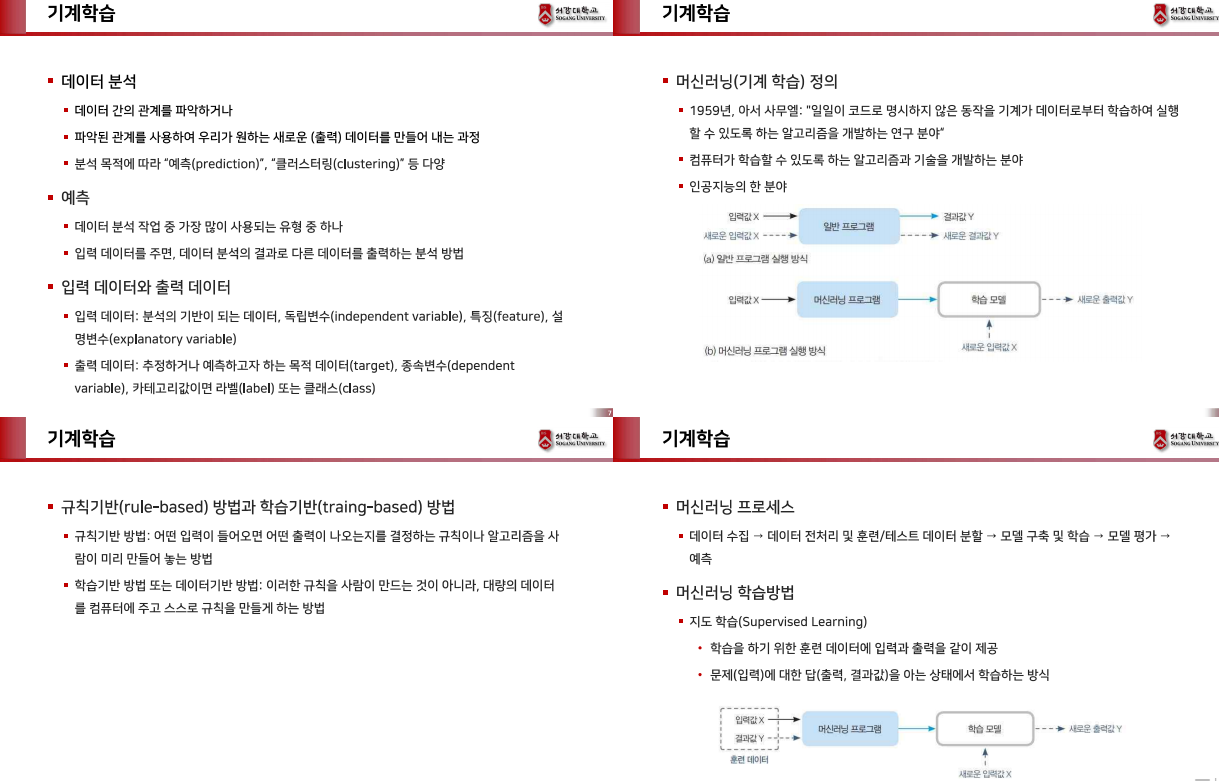

---

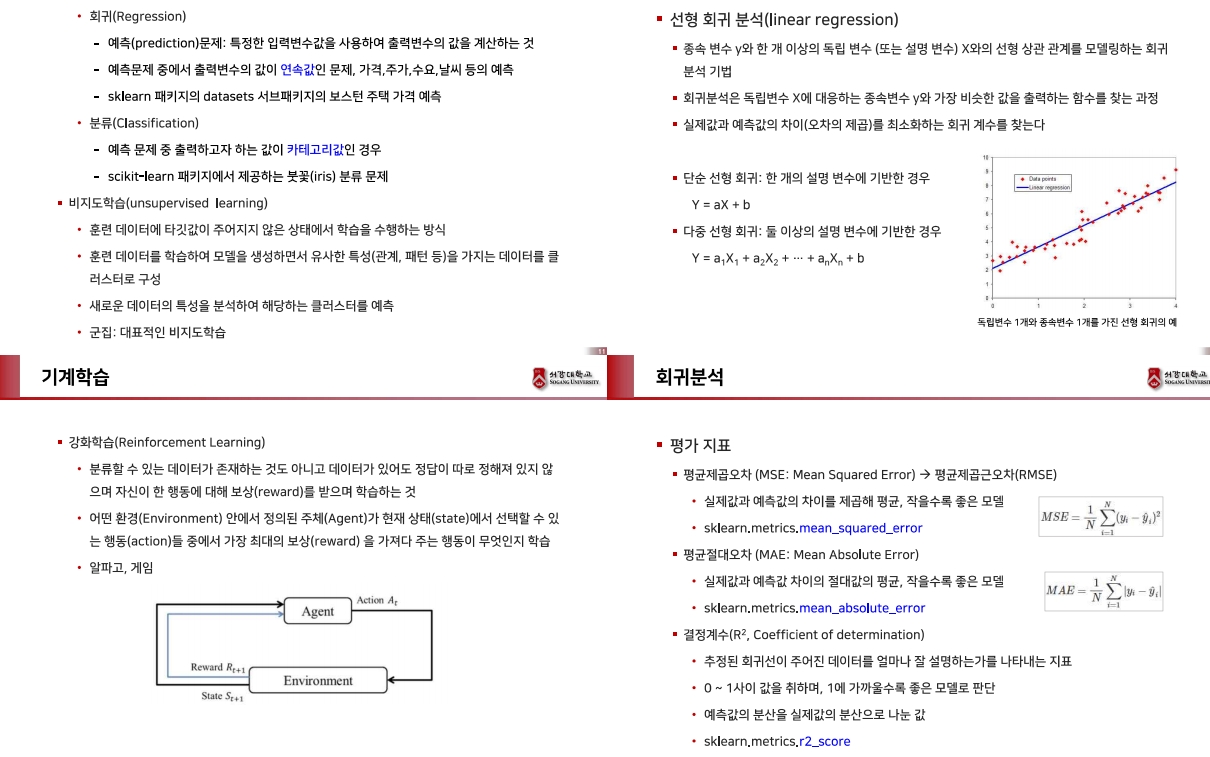

In [46]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data_df = pd.read_csv('./auto-mpg.csv', header=0)
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis = 1) # 열 삭제

In [47]:
# X, Y 분할하기 
# 선형 회귀 분석 모델 구축: X, Y 분할
# mpg 피처를 회귀식의 종속 변수 Y로 설정하고, mpg를 제외한 나머지 피처를 독립 변수 X로 설정

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1) 
print(' 데이터셋 크기 : ', X.shape)
X.head()

 데이터셋 크기 :  (398, 5)


,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70


In [48]:
# 자동차 연비에 영향을 미치는 항목 확인과 그에 따른 연비 예측
#     분석 모델 구축, 결과 분석 및 시각화: 선형 회귀를 이용해 분석 모델 구축
#     데이터분할: X와 Y 데이터 398개를 학습 데이터와 평가 데이터로 7:3 비율로 분할
#     모델 생성: 선형 회귀 분석 모델 객체 lr을 생성
#     모델 훈련: 학습 데이터 X_train와 Y_train를 가지고 학습을 수행: fit()
#     예측: 평가 데이터 X_test로 예측 수행하여 예측값 Y_predict를 구함: predict()

# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 
#선형 회귀 분석 : 모델 생성
lr = LinearRegression()
#선형 회귀 분석 : 모델 훈련 
lr.fit(X_train, Y_train)
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기 
Y_predict = lr.predict(X_test)
Y_predict

array([12.68813886, 24.89235692, 11.77966226, 20.713484  , 17.59974974,
       28.70463932, 31.8246109 , 24.79459783, 13.3797074 , 28.03809202,
       33.95480562, 32.517138  , 21.28643713, 26.32547953, 16.29305741,
       32.16905355, 30.04731897, 29.90617451, 17.78110613, 30.69577551,
       15.33574367, 25.60299563, 25.4723533 , 20.04730443, 30.70244174,
       26.79576507, 32.20306918, 31.95533215, 30.42830733, 18.19432511,
       21.19981862, 29.62938625, 20.86352443, 30.82503708, 24.35511863,
       23.81034331, 21.45816755, 16.77101118, 31.95362794,  8.06590693,
        9.60178767, 13.8699291 , 27.26165312, 29.00102026, 29.52364892,
       22.58571769, 23.20233694, 13.80533693, 23.86039376, 28.12535283,
       31.40954528, 26.70297991, 15.34381889, 25.01897062, 14.71481708,
        9.53883961, 19.64272577, 26.82491432, 31.30917854, 14.99268593,
       20.64360774, 25.57610711, 22.45200894, 19.72033566, 10.7918702 ,
       11.42513414,  9.7023088 , 19.68724093, 24.98227534,  9.68

In [49]:
# 평가 지표를 통해 선형 회귀 분석 모델을 평가하고 회귀 계수를 확인하여 자동차 연비에 끼치는 피처의 영향을 분석

# 평가 지표 MSE
mse = mean_squared_error(Y_test, Y_predict)
rmse = mean_squared_error(Y_test, Y_predict, squared=False) 
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# 평가 지표 R2
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))
print()
print('Y 절편 값: ',  np.round(lr.intercept_, 2)) 
print('회귀 계수 값: ', np.round(lr.coef_, 2))

coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns) 
display(coef.sort_values(ascending=False)) # 회귀 계수 값들

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

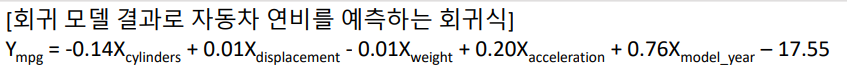

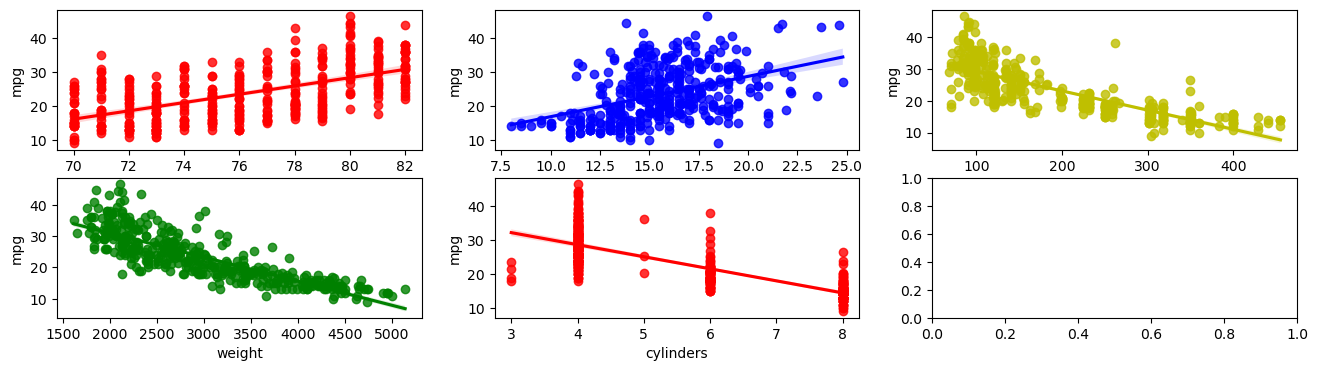

In [50]:
# 선형회귀 그래프 시각화

import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(16, 4), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

In [51]:
# enumerate()
for entry in enumerate(['A', 'B', 'C']):
    print(entry)
print()
for i, letter in enumerate(['A', 'B', 'C']):
    print(i, letter)

(0, 'A')
(1, 'B')
(2, 'C')

0 A
1 B
2 C


## 분류 기본과 로지스틱 회귀

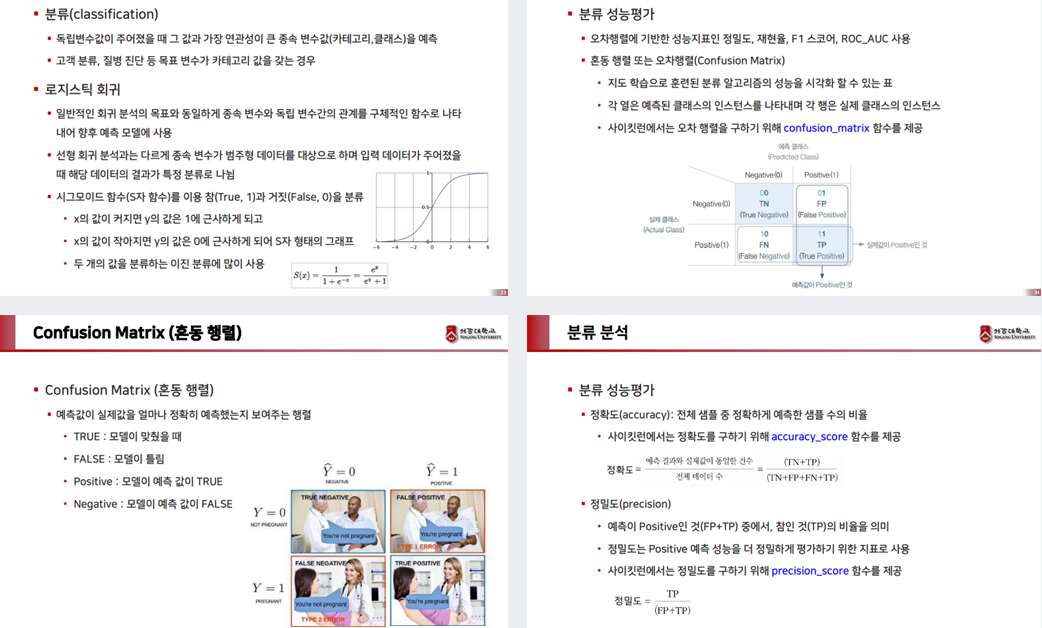

---

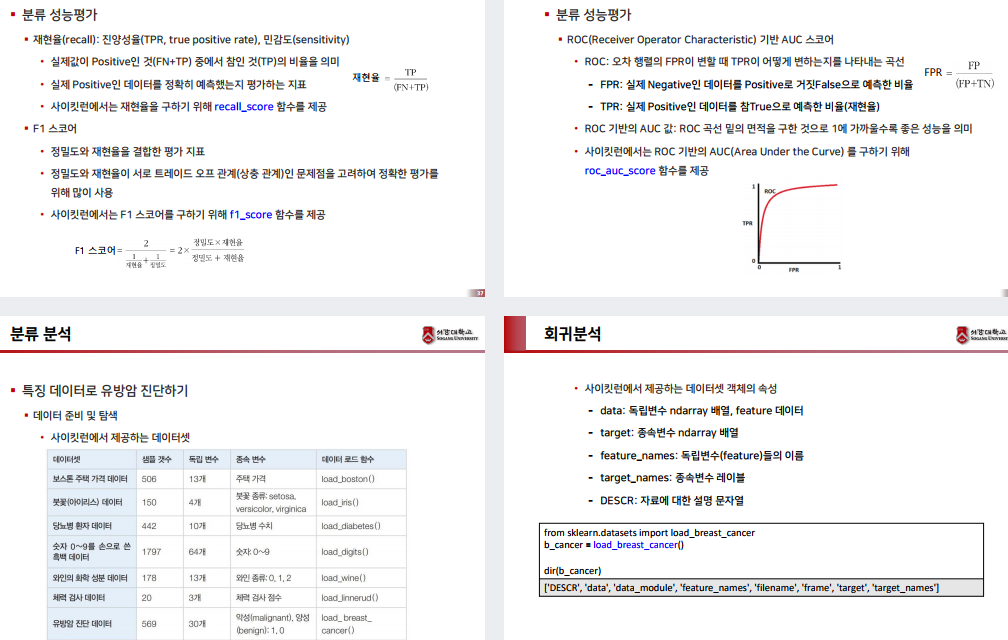

In [52]:
from sklearn.datasets import load_breast_cancer 
b_cancer = load_breast_cancer()
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# 데이터 스케일링: StandardScaler(데이터를 평균 0, 분산 1이 되도록 표준화)
scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data) # b_cancer.data는 X데이터 b_cancer.targer이 Y데이터

#X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled # b_cancer_df.drop(['diagnosis'], axis=1)  -> 스케일링 안한버전
#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
#로지스틱 회귀 분석: 모델 생성
lr_b_cancer = LogisticRegression(max_iter=10000)
#로지스틱 회귀 분석: 모델 훈련
lr_b_cancer.fit(X_train, Y_train)
#로지스틱 회귀 분석: 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
#오차 행렬
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [55]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(accuracy,precision,recall,f1))
print('ROC_AUC: {0:.3f}'.format(roc_auc))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982
ROC_AUC: 0.972


## 결정 트리
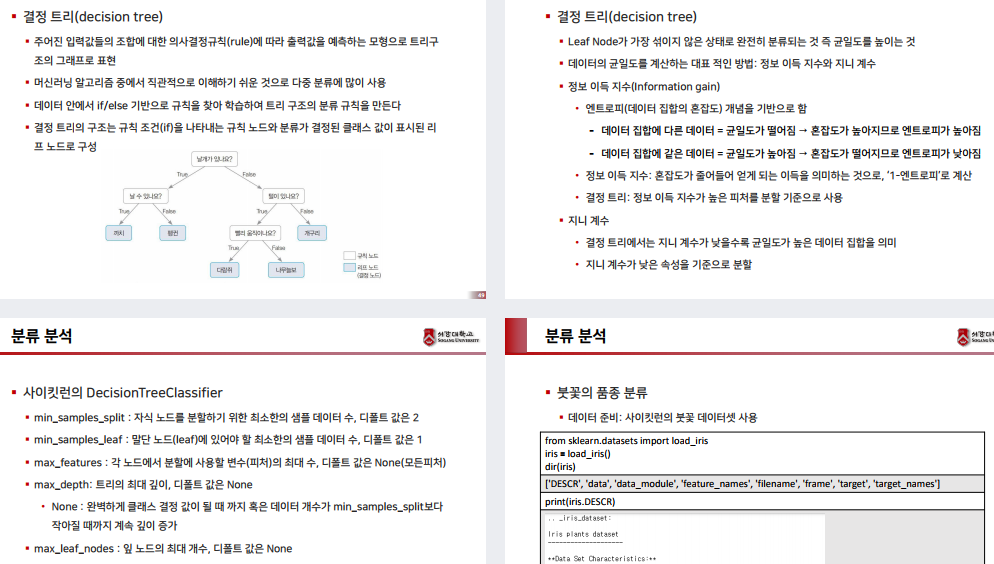

In [56]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

결정 트리 예측 정확도 : 0.9778
특성 중요도 :[0.02150464 0.02150464 0.90006666 0.05692405]


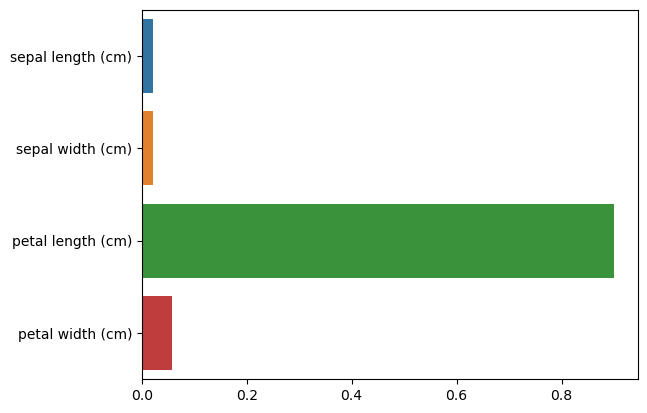

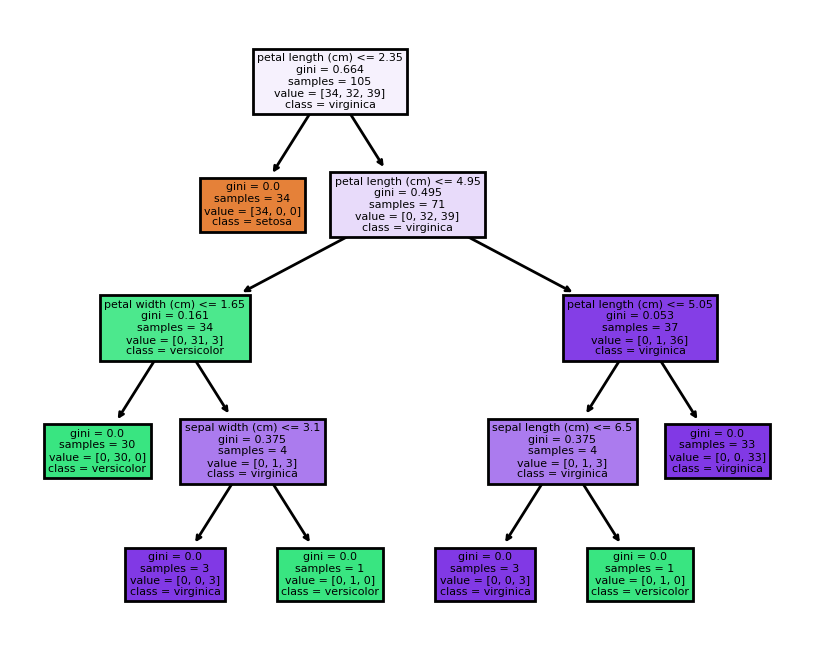

In [57]:
#훈련용 데이터와 평가용 데이터 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state=0)

#결정트리 분류 분석: 모델 생성
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=156)

#결정트리 분류 분석: 모델 훈련
clf.fit(X_train, Y_train)

#결정트리 분류 분석: 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = clf.predict(X_test)
display(Y_predict)

# 모델 성능과 feature 중요도
accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))
print("특성 중요도 :{}".format(clf.feature_importances_))
sns.barplot(x=clf.feature_importances_, y=iris.feature_names)
plt.show()

# plot_tree로 whitening
from sklearn.tree import plot_tree
plt.figure(figsize=(5,4), dpi=200)
plot_tree(clf, feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True)
plt.show()